In [1]:
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input, decode_predictions
import numpy as np
from keras.preprocessing import image
import operator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from keras import models, layers, optimizers
from sklearn.preprocessing import LabelBinarizer

folders = ["birds/toucan/tou", "birds/egret/egr", "birds/mandarin/man", "birds/wood_duck/wod", "birds/puffin/puf", 
           "birds/owl/owl"]
birds = ["toucan", "American_egret", "mandarin", "wood_duck", "puffin", "owl"]

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = MobileNet(weights='imagenet')

In [3]:
def predict(img_path):    
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return decode_predictions(preds, top=3)[0][0][1]

In [5]:
d = {}
for i in range(6):
    for j in range(1,101):
        s = predict(folders[i]+str(j).zfill(3)+".jpg")
        if s in d:
            d[s] += 1
        else:
            d[s] = 1

/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 334102528 bytes but o

In [6]:
sd = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
ten = []
for i in range(min(len(sd), 10)):
    ten.append(sd[i][0])

In [52]:
true = []
pred = []
for i in range(6):
    for j in range(1,101):
        s = predict(folders[i]+str(j).zfill(3)+".jpg")
        if s in ten:
            pred.append(s)
        else:
            pred.append("other")
        true.append(birds[i])

/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 334102528 bytes but o

In [43]:
for j in range(6):
    for i in range(j*100,(j+1)*100):
        print(true[i], "\t", pred[i])

toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	 toucan
toucan 	

In [3]:
def plot_confusion_matrix(cm, xclasses, yclasses, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    xtick_marks = np.arange(len(xclasses))
    ytick_marks = np.arange(len(yclasses))
    plt.xticks(xtick_marks, xclasses, rotation=90)
    plt.yticks(ytick_marks, yclasses)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 0 91  0  0  0  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  1 80  0  0  0  0 18  0  0  0  0  1  0]
 [18  0  4  0 14  0  0  0 37  0 27  0  0  0  0]
 [ 0  0 16 12  0  8 18  0 19  0  1  0 20  6  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0 97  0  0]
 [ 0  0  0 97  0  0  1  0  2  0  0  0  0  0  0]]


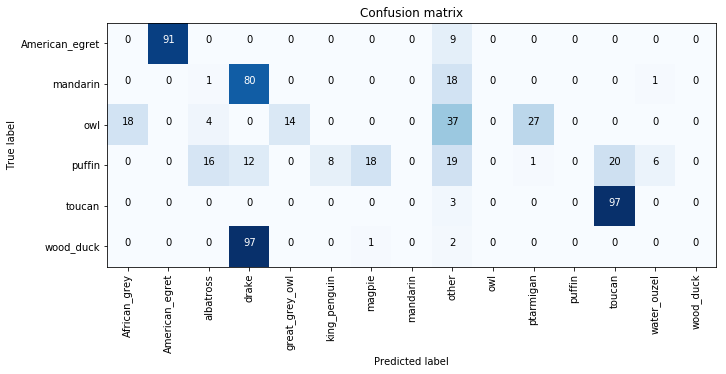

In [96]:
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
s = set()
for i in ten:
    s.add(i)
for i in birds:
    s.add(i)
s.add("other")
l = sorted(list(s))
indices = []
for i in range(len(l)):
    if l[i] in birds:
        indices.append(i)
plot_confusion_matrix(np.array([[x for x in cnf_matrix[y]] for y in indices]), yclasses=sorted(birds), xclasses=l,
                     normalize=False)

### Train model with no trainable mobilenet layers
### Train Model without removing layers

In [47]:
training = 71
validation = 101
birdsNum = 3
epochs = 1
batch_size = 1
def loadImage(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)    
    return preprocess_input(x)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [21]:
model2 = models.Sequential()
model2.add(model)

model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

for layer in model2.layers[:-2]:
    layer.trainable = False
    
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 4,511,662
Trainable params: 257,798
Non-trainable params: 4,253,864
_________________________________________________________________


In [22]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [48]:
x, y, vx, vy = [], [], [], []

for i in range(birdsNum):
    for j in range(1,training):
        x.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        y.append([i])
        
for i in range(birdsNum):
    for j in range(training,validation):
        vx.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        vy.append([i])

encoder = LabelBinarizer()
x = np.array(x)
y = np.array(y)
vy = np.array(vy)
vx = np.array(vx)
v = (vx, vy)

In [45]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [46]:
model2.fit(x, y, epochs=epochs, batch_size=4, validation_data=v)

Train on 70 samples, validate on 30 samples
Epoch 1/1
32/70 [============>.................] - ETA: 7s - loss: 1.4721 - acc: 1.0000

KeyboardInterrupt: 

In [39]:
score = model2.evaluate(vx, vy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7342249115308126
Test accuracy: 0.5


### Confussion matrix

In [41]:
def getPredicted(pred):    
    c, m = 0, 0
    for i in range(pred.shape[1]):
        if pred[0][i] > m:
            m = pred[0][i]
            c = birds[i]
    return c

def predict2(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return getPredicted(model2.predict(x))

In [43]:
true = []
pred = []
for i in range(birdsNum):
    for j in range(1,101):
        s = predict2(folders[i]+str(j).zfill(3)+".jpg")
        pred.append(s)
        true.append(birds[i]) 

In [46]:
print(predict2("birds/egret/egr010.jpg"))
print(predict2("birds/toucan/tou010.jpg"))
print(predict2("birds/toucan/tou018.jpg"))
print(predict2("birds/egret/egr100.jpg"))
print(predict2("birds/owl/owl050.jpg"))

toucan
toucan
toucan
toucan
toucan


Confusion matrix, without normalization
[[  0 100]
 [  0 100]]


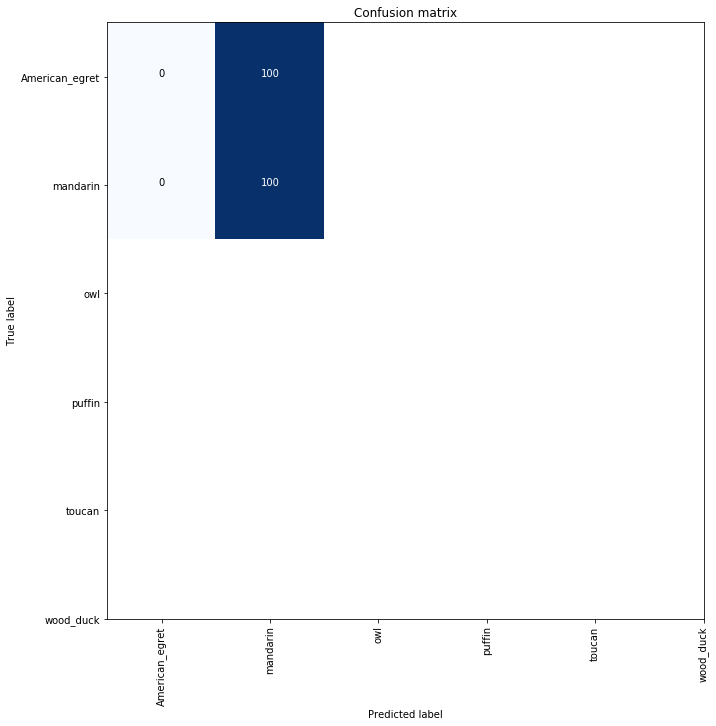

In [51]:
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, yclasses=sorted(birds), xclasses=sorted(birds), normalize=False)

### Train Model removing 2 layers till convolutional layer

In [53]:
model.layers.pop()
model.layers.pop()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [129]:
model2 = models.Sequential()
model2.add(model)

model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

for layer in model2.layers[:-2]:
    layer.trainable = False
    
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
dense_22 (Dense)             (None, 256)               256256    
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 1542      
Total params: 4,511,662
Trainable params: 257,798
Non-trainable params: 4,253,864
_________________________________________________________________


In [133]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [131]:
x, y, vx, vy = [], [], [], []

for i in range(birdsNum):
    for j in range(1,training):
        x.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        y.append(birds[i])
        
for i in range(birdsNum):
    for j in range(training,validation):
        vx.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        vy.append(birds[i])

encoder = LabelBinarizer()
x = np.array(x)
y = encoder.fit_transform(np.array(y))
vy = encoder.fit_transform(np.array(vy))
vx = np.array(vx)
v = (vx, vy)

In [134]:
model2.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=v)

Train on 60 samples, validate on 40 samples
Epoch 1/1
60/60 [==============================] - 26s 429ms/step - loss: 1.6455 - acc: 0.4667 - val_loss: 1.5254 - val_acc: 0.9750


In [135]:
score = model2.evaluate(vx, vy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5254130840301514
Test accuracy: 0.975


In [145]:
true = []
pred = []
for i in range(birdsNum):
    for j in range(1,101):
        s = predict2(folders[i]+str(j).zfill(3)+".jpg")
        pred.append(s)
        true.append(birds[i]) 

Confusion matrix, without normalization
[[  0 100]
 [  0 100]]


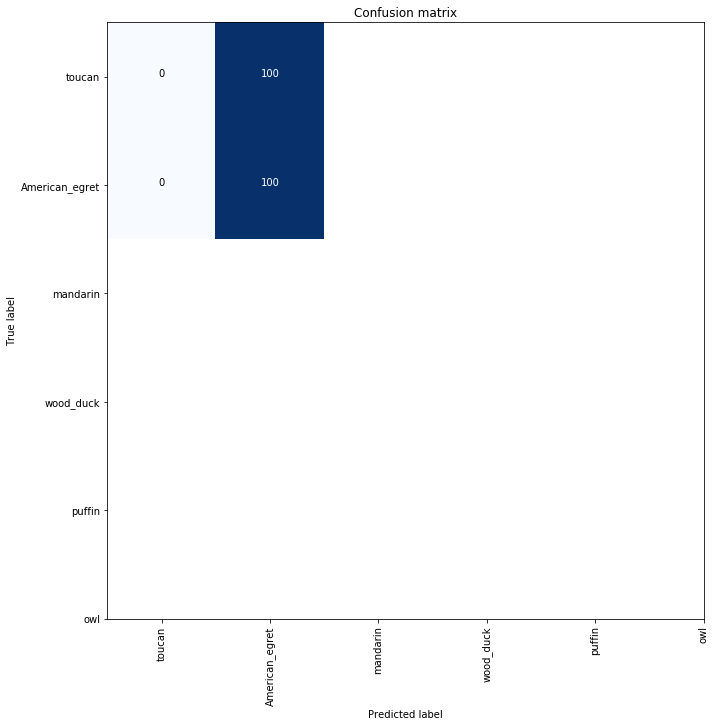

In [149]:
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, yclasses=sorted(birds), xclasses=sorted(birds), normalize=False)

### Training all the model

In [54]:
model2 = models.Sequential()
model2.add(model)

model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))

for layer in model2.layers:
    print(layer, layer.trainable)
    
model2.summary()

<keras.engine.training.Model object at 0x7f4e60b5b160> True
<keras.layers.core.Dense object at 0x7f4e606fe048> True
<keras.layers.core.Dense object at 0x7f4e606f5cc0> True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1000)              4253864   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 4,511,662
Trainable params: 4,489,774
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc'])

In [ ]:
x, y, vx, vy = [], [], [], []

for i in range(birdsNum):
    for j in range(1,training):
        x.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        y.append(birds[i])
        
for i in range(birdsNum):
    for j in range(training,validation):
        vx.append(loadImage(folders[i]+str(j).zfill(3)+".jpg"))
        vy.append(birds[i])

encoder = LabelBinarizer()
x = np.array(x)
y = encoder.fit_transform(np.array(y))
vy = encoder.fit_transform(np.array(vy))
vx = np.array(vx)
v = (vx, vy)

In [ ]:
model2.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=v)

In [ ]:
score = model2.evaluate(vx, vy, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
true = []
pred = []
for i in range(birdsNum):
    for j in range(1,101):
        s = predict2(folders[i]+str(j).zfill(3)+".jpg")
        pred.append(s)
        true.append(birds[i]) 

In [ ]:
cnf_matrix = confusion_matrix(true, pred)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, yclasses=sorted(birds), xclasses=sorted(birds), normalize=False)